**IMPORTING THE NECESSARY LIBRARIES**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

**READING THE CSV FILE**




In [152]:
data = pd.read_csv('/content/displacement_dataset.csv')
# encodeddata = pd.read_csv('/content/displacement_dataset.csv')
data.shape

(34812, 9)

In [153]:
data.columns

Index(['Month End', 'Year Week', 'Current (Arrival) Region',
       'Current (Arrival) District', 'Previous (Departure) Region',
       'Previous (Departure) District', 'Reason',
       'Current (Arrival) Priority Need', 'Number of Individuals'],
      dtype='object')

**REPLACING THE COLUMN NAMES FOR EASIER ACCESS**

In [154]:
data.columns = data.columns.str.replace(" ","_")
data.columns = data.columns.str.replace("(","")
data.columns = data.columns.str.replace(")","")
data.columns

Index(['Month_End', 'Year_Week', 'Current_Arrival_Region',
       'Current_Arrival_District', 'Previous_Departure_Region',
       'Previous_Departure_District', 'Reason',
       'Current_Arrival_Priority_Need', 'Number_of_Individuals'],
      dtype='object')

**UNIQUE VARIABLES IN EACH OF THE COLUMNS**

In [155]:
print('Current_Arrival_Region: ',len(data.Current_Arrival_Region.unique()))
print('\nCurrent_Arrival_District: ',len(data.Current_Arrival_District.unique()))
print('\nPrevious_Departure_Region: ',len(data.Previous_Departure_Region.unique()))
print('\nPrevious_Departure_District: ',len(data.Previous_Departure_District.unique()))
print('\nReason: ',len(data.Reason.unique()))
print('\nCurrent_Arrival_Priority_Need: ',len(data.Current_Arrival_Priority_Need.unique()))

Current_Arrival_Region:  18

Current_Arrival_District:  76

Previous_Departure_Region:  18

Previous_Departure_District:  77

Reason:  4

Current_Arrival_Priority_Need:  9


**DISTRIBUTION OF REASON WITH DISPLACEMENT**

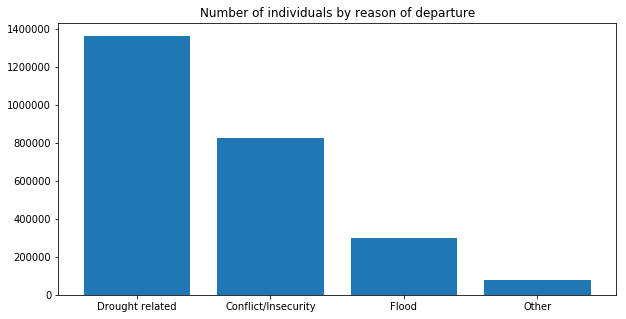

In [156]:
#print(data.Reason.value_counts())
reason = (data.groupby('Reason')
              .aggregate({'Number_of_Individuals': 'sum'})
              .sort_values('Number_of_Individuals', ascending = False))

plt.figure(figsize=(10,5))
plt.bar(reason.index, reason['Number_of_Individuals'])
plt.title('Number of individuals by reason of departure')
plt.show()


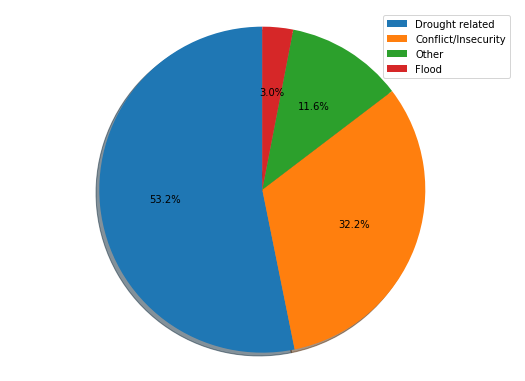

In [157]:
labels = ['Drought related', 'Conflict/Insecurity', 'Other', 'Flood']
# number_reason = data.Number_of_Individuals.groupby(data.Reason)
fig1,ax1 = plt.subplots(figsize=(10,5))
fig1.subplots_adjust(0.3,0,1,1)
ax1.pie(reason.Number_of_Individuals, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(labels=labels)
plt.show()


**DISTRIBUTION OF Current_Arrival_Priority_Need WITH DISPLACEMENT**

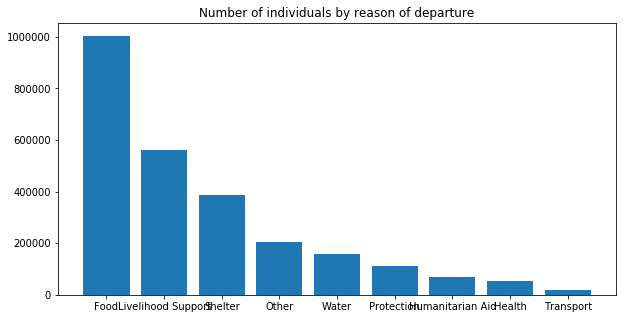

In [158]:
#print(data.Current_Arrival_Priority_Need.value_counts())
needs = (data.groupby('Current_Arrival_Priority_Need')
              .aggregate({'Number_of_Individuals': 'sum'})
              .sort_values('Number_of_Individuals', ascending = False))
plt.figure(figsize=(10,5))
plt.bar(needs.index, needs['Number_of_Individuals'])
plt.title('Number of individuals by reason of departure')
plt.show()


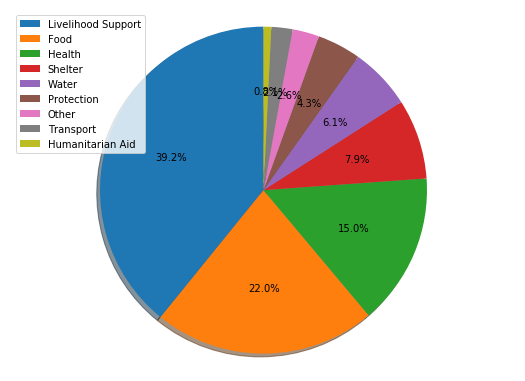

In [159]:
labels = ['Livelihood Support', 'Food', 'Health', 'Shelter', 'Water',
       'Protection', 'Other', 'Transport', 'Humanitarian Aid']
# number_reason = data.Number_of_Individuals.groupby(data.Reason)
fig1,ax1 = plt.subplots(figsize=(10,5))
fig1.subplots_adjust(0.3,0,1,1)
ax1.pie(needs.Number_of_Individuals,  autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.legend(labels=labels)
plt.show()


In [0]:
# data['Week']  = data['Year_Week'].str.extract('(\d{2}$)', expand = True)
#data.Year_Week.unique()
# needs = (data.groupby('Year_Week')
#               .aggregate({'Number_of_Individuals': 'sum'})
#               .sort_values('Number_of_Individuals', ascending = False))
# needs

In [161]:
# LABEL ENCODING THE FEATURES
le = LabelEncoder()
encodeddata = data
encodeddata.iloc[:,2]= le.fit_transform(data.iloc[:,2])
encodeddata.iloc[:,3]= le.fit_transform(data.iloc[:,3])
encodeddata.iloc[:,4]= le.fit_transform(data.iloc[:,4])
encodeddata.iloc[:,5]= le.fit_transform(data.iloc[:,5])
encodeddata.iloc[:,6]= le.fit_transform(data.iloc[:,6])
encodeddata.iloc[:,7]= le.fit_transform(data.iloc[:,7])
#le.head()
encodeddata.head()

,Month_End,Year_Week,Current_Arrival_Region,Current_Arrival_District,Previous_Departure_Region,Previous_Departure_District,Reason,Current_Arrival_Priority_Need,Number_of_Individuals
0,31-01-16,201601,0,15,1,70,1,3,7
1,31-01-16,201601,0,15,2,9,1,3,7
2,31-01-16,201602,0,15,2,9,1,3,8
3,31-01-16,201604,0,15,2,9,1,3,5
4,31-01-16,201604,0,15,2,9,1,3,6


In [162]:
encodeddata.describe()

,Year_Week,Current_Arrival_Region,Current_Arrival_District,Previous_Departure_Region,Previous_Departure_District,Reason,Current_Arrival_Priority_Need,Number_of_Individuals
count,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000,34812.000000
mean,201803.223170,7.925256,32.073624,8.024302,36.909313,0.952344,2.579656,73.601948
std,90.351486,5.396378,21.653558,4.835311,22.802577,0.775103,2.615267,572.072472
min,201600.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,201733.000000,3.000000,9.000000,4.000000,15.000000,1.000000,0.000000,6.000000
50%,201821.000000,8.000000,36.000000,8.000000,39.000000,1.000000,3.000000,8.000000
75%,201852.000000,12.000000,51.000000,12.000000,59.000000,1.000000,4.000000,19.000000
max,201931.000000,17.000000,75.000000,17.000000,76.000000,3.000000,8.000000,78000.000000


**HEAT MAP OF THE DATA**

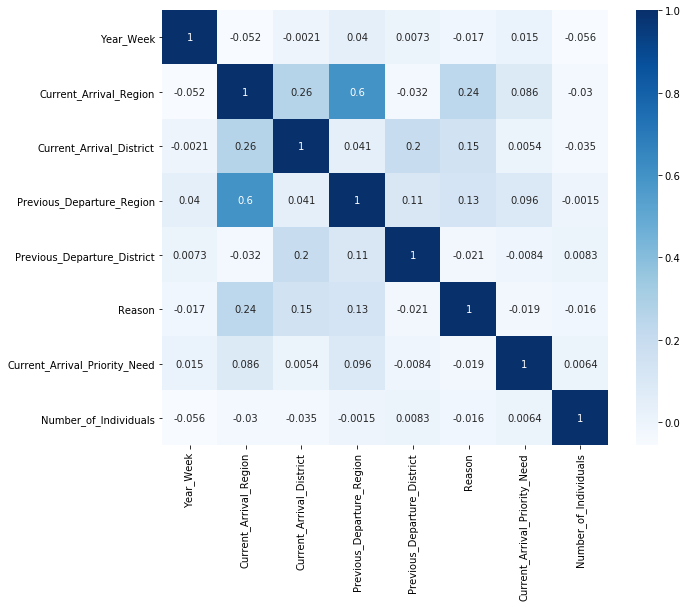

In [163]:
plt.figure(figsize=(10,8))
sns.heatmap(encodeddata.corr(),cmap='Blues',annot=True)